In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("mnist_test.csv",sep=',') #reading data 

df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualiza some digits

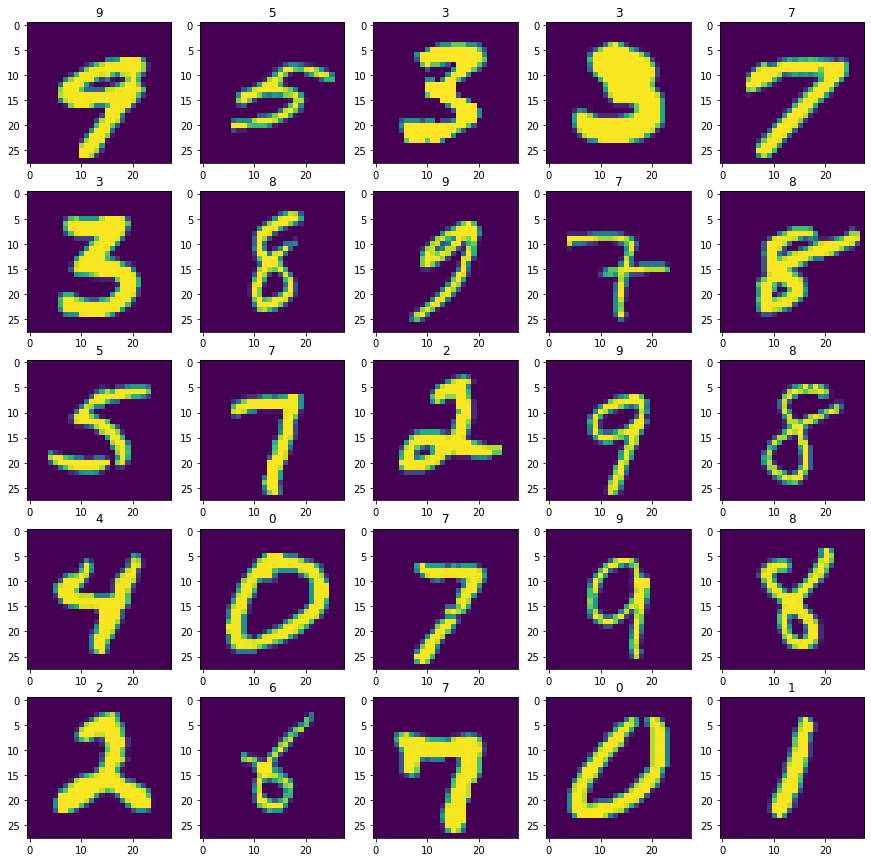

In [3]:
random_digits = np.random.randint(len(df['label'].unique()), size=25) #random selection 
fig, ax = plt.subplots(5,5,figsize=(15,15)) # make a figure 

j = 0 
k = 0
for i in random_digits:
    
    
        
    digit = df[df['label'] == i].drop(['label'],axis=1).reset_index(drop=True) # matrix values for the digits i 

    img = digit.iloc[np.random.randint(digit.shape[0])].to_numpy().reshape(28,28) # reshape to plot the image 

    ax[j,k].imshow(img,aspect='auto')
    ax[j,k].set_title('{}'.format(i))
    
    k += 1
    if k == 5:
        k = 0
        j += 1

# Split the data into train and test 

In [4]:
X_data = df.drop(['label'], axis=1).to_numpy() # features into numpy arrays 
y_data = df[['label']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # Split the data 


<h2 id="multiple_regression_model">Train the model using X_train and y_train sets using scikit-learn</h2>


In [5]:
logreg = LogisticRegression() # logistic regression model
logreg.fit(X_train, y_train) # fit with train data 

print(f'Accuracy of Logistic regression classifier on training set: {logreg.score(X_train, y_train):.3f}')
print(f'Accuracy of Logistic regression classifier on test set: {logreg.score(X_test, y_test):.3f}')

/home/andresm9806/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of Logistic regression classifier on training set: 0.995
Accuracy of Logistic regression classifier on test set: 0.883


/home/andresm9806/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h2 id="prediction">Prediction digits from ten random images</h2>

In [6]:
test_digits = np.random.randint(2000,size = 10)

for i in test_digits:
    d0, d1, d2, d3, d4, d5,d6, d7, d8, d9 = logreg.predict_proba([X_test[i]])[0]

    print("\nProbability of prediction of each digit of the model")
    print('\n0: ', d0, "\n1:",d1,"\n2:", d2,"\n3:", d3,"\n4:", d4,"\n5:", d5,"\n6:",d6,"\n7:", d7,"\n8:", d8,"\n9:", d9)

    print("\nTrue value: ",y_test[i][0])
    print("------------------------------")


Probability of prediction of each digit of the model

0:  2.666403857201405e-37 
1: 2.9690768728777016e-50 
2: 3.8157335466565257e-28 
3: 2.8517885886723224e-21 
4: 1.0842278619792731e-12 
5: 4.8422625133773805e-24 
6: 9.73380219718203e-24 
7: 0.0002813648098056385 
8: 2.157253554034574e-13 
9: 0.9997186351888945

True value:  9
------------------------------

Probability of prediction of each digit of the model

0:  9.628198887930596e-56 
1: 3.042031125045133e-17 
2: 3.483867017563801e-13 
3: 9.470629710341617e-11 
4: 0.009127684020521921 
5: 4.840284746619954e-15 
6: 2.521047543361983e-25 
7: 8.593122771661371e-12 
8: 4.152292226426001e-06 
9: 0.990868163583599

True value:  9
------------------------------

Probability of prediction of each digit of the model

0:  1.5293711562743694e-26 
1: 1.746993501325699e-14 
2: 1.5992752928470993e-06 
3: 0.03733667573366338 
4: 3.682341409415728e-19 
5: 5.600295642240351e-21 
6: 5.572923477536661e-29 
7: 8.382989812822615e-30 
8: 0.96266172499